In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('blogs.csv')

#### EDA

In [4]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [5]:
df.shape

(2000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [7]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [8]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [9]:
df['Labels'].value_counts()

alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: Labels, dtype: int64

In [11]:
import nltk

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import nltk
import spacy
nlp= spacy.load('en_core_web_sm')
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
from sklearn.pipeline import Pipeline

In [17]:
df['len']= df['Data'].apply(len)
df

,Data,Labels,len
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,5972
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1336
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,3116
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,15910
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,3264
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,5263
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,1771
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,2192
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,3197


In [18]:
df['len'].describe()

count     2000.000000
mean      2324.978000
std       3590.560226
min        425.000000
25%       1147.000000
50%       1605.500000
75%       2374.500000
max      62290.000000
Name: len, dtype: float64

In [21]:
lem= WordNetLemmatizer()
stem= PorterStemmer()

In [22]:
import re

In [23]:
def cleanwords(data):
    data= ' '.join(re.findall('\w+',data))
    doc= nlp(data)
    clean_text= [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_digit
                 and not token.is_bracket and not token.is_currency]
    return clean_text

array([[<Axes: title={'center': 'alt.atheism'}>,
        <Axes: title={'center': 'comp.graphics'}>,
        <Axes: title={'center': 'comp.os.ms-windows.misc'}>,
        <Axes: title={'center': 'comp.sys.ibm.pc.hardware'}>],
       [<Axes: title={'center': 'comp.sys.mac.hardware'}>,
        <Axes: title={'center': 'comp.windows.x'}>,
        <Axes: title={'center': 'misc.forsale'}>,
        <Axes: title={'center': 'rec.autos'}>],
       [<Axes: title={'center': 'rec.motorcycles'}>,
        <Axes: title={'center': 'rec.sport.baseball'}>,
        <Axes: title={'center': 'rec.sport.hockey'}>,
        <Axes: title={'center': 'sci.crypt'}>],
       [<Axes: title={'center': 'sci.electronics'}>,
        <Axes: title={'center': 'sci.med'}>,
        <Axes: title={'center': 'sci.space'}>,
        <Axes: title={'center': 'soc.religion.christian'}>],
       [<Axes: title={'center': 'talk.politics.guns'}>,
        <Axes: title={'center': 'talk.politics.mideast'}>,
        <Axes: title={'center': 'ta

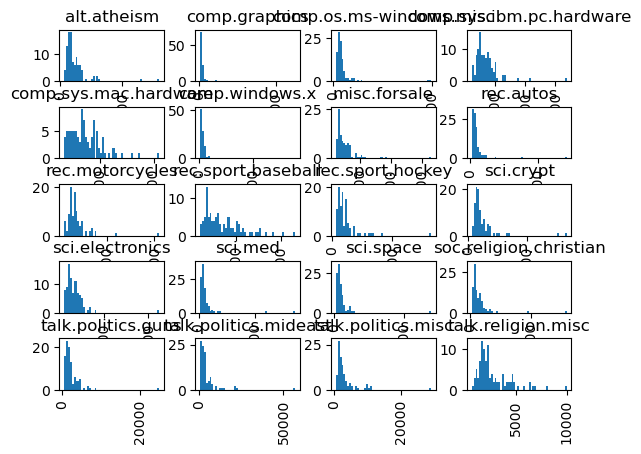

In [30]:
df.hist('len',by='Labels',bins=50)

In [31]:
count= CountVectorizer(analyzer=cleanwords)

In [32]:
x= count.fit_transform(df['Labels'])

In [33]:
x.toarray()

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

#### NB 

In [34]:
multi= MultinomialNB()

In [36]:
tfidf= TfidfTransformer()
y=tfidf.fit_transform(x)

In [37]:
multi.fit(y,df['Labels'])

MultinomialNB()

In [38]:
y_pred=multi.predict(y)

In [40]:
accuracy_score(df['Labels'],y_pred)

1.0

In [41]:
x_train,x_test,y_train,y_test= train_test_split(df['Data'],df['Labels'],train_size=0.75, random_state=100)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500,)
(500,)
(1500,)
(500,)


In [43]:
pipeline= Pipeline([('count',CountVectorizer(analyzer=cleanwords)),('tfidf',TfidfTransformer()),
                   ('multi',MultinomialNB())])

In [44]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('count',
                 CountVectorizer(analyzer=<function cleanwords at 0x000001F10A102520>)),
                ('tfidf', TfidfTransformer()), ('multi', MultinomialNB())])

In [45]:
y_pred=pipeline.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred)

0.816

#### Sentiment Analysis

In [53]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [59]:
from textblob import TextBlob

In [60]:
def get_sentiment(text):
    blob = TextBlob(text)
    # Classify sentiment as 'positive', 'negative', or 'neutral'
    if blob.sentiment.polarity > 0:
        return 'positive'
    elif blob.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [63]:
df['sentiment'] = df['Labels'].apply(get_sentiment)

In [64]:
print(df[['Data', 'sentiment']].head())

                                                Data sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   neutral
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   neutral
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   neutral
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   neutral
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   neutral


In [65]:
def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    
    # Get the polarity score of the text
    polarity = blob.sentiment.polarity
    
    # Classify sentiment based on polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


In [66]:
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Show the first few rows of the dataframe
print(df[['Data', 'Sentiment']].head())

                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive


In [67]:
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

In [68]:
print(sentiment_distribution)

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


In [69]:
import matplotlib.pyplot as plt

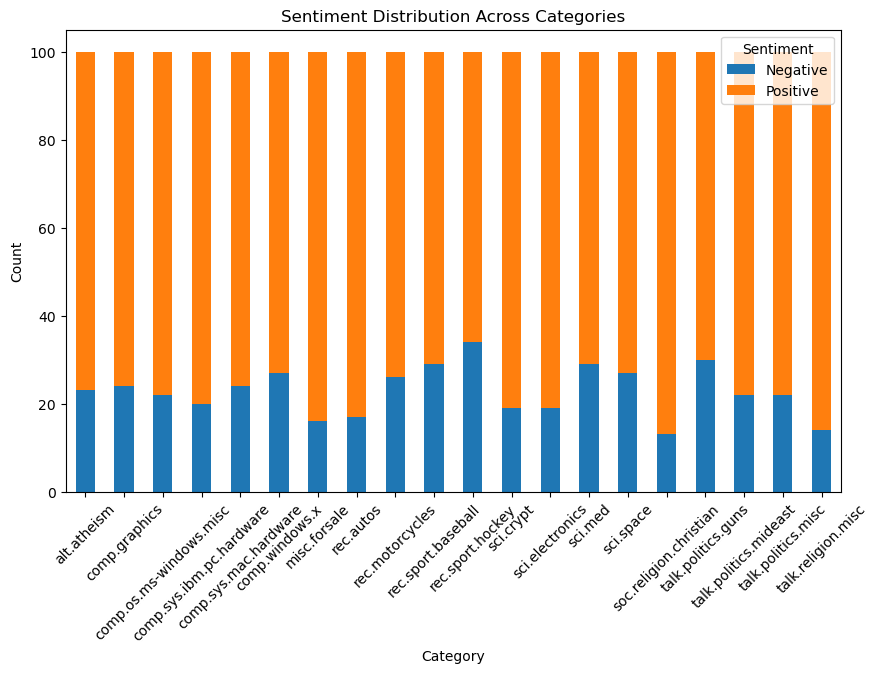

In [70]:
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### The Naive Bayes classifier 
It is a probabilistic machine learning model used for classification tasks. It is based on Bayes' theorem, with the "naive" assumption that features (or predictors) are independent given the class. Despite this often unrealistic assumption of feature independence, Naive Bayes classifiers perform surprisingly well in many real-world applications, particularly in text classification and natural language processing.

#In conclusion, the Naive Bayes classifier, with proper preprocessing and feature extraction, can effectively categorize blog posts. Performance evaluation using metrics such as accuracy, precision, recall, and F1-score provides a comprehensive view of the model’s effectiveness. Challenges such as class imbalance and text preprocessing need careful handling to ensure robust performance.Sentiment analysis adds another layer of understanding, revealing the emotional tone of the blog posts. These insights can be crucial for content strategy, reader engagement, and marketing efforts.By combining text classification with sentiment analysis, you gain a powerful toolkit for extracting and leveraging insights from textual data, enhancing both the analytical and strategic capabilities.